In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
counts_table_path = '/Users/stephaniecrilly/test/count_table.csv'
counts_table = pd.read_csv(counts_table_path, sep='\t')

Each column represents a given sort condition (concentration and bin). Normalizing the counts for each design (row) as a fraction of total counts matching library designs for each sort condition by dividing each value by the summed column counts. 

In [353]:
#divide every column by the sum of the column
norm_counts_table = counts_table.copy()
for col in norm_counts_table.columns:
    if col == 'design':
        continue
    else:
        norm_counts_table[col] = norm_counts_table[col] / norm_counts_table[col].sum() 

print(norm_counts_table)

                                design  r1-hs-8-1  r1-hs-2-4  r1-hs-5-3  \
0    01034_ALFA_53_7_min_0_53_g4s_loop   0.033530   0.006539   0.029063   
1    01934_ALFA_53_4_min_0_53_g4s_loop   0.000511   0.012743   0.000221   
2    02231_ALFA_53_4_min_0_53_g4s_loop   0.032103   0.022468   0.000069   
3   02532_ALFA_53_7_min_0_53_bm01_loop   0.001473   0.029678   0.007591   
4   02532_ALFA_53_8_min_0_53_bm01_loop   0.000869   0.016935   0.000071   
..                                 ...        ...        ...        ...   
92              bm01_L2_myc_ALFA_t6_v2   0.018414   0.004863   0.000108   
93              bm01_L3_myc_ALFA_t6_v2   0.009833   0.061871   0.000044   
94              bm01_L4_myc_ALFA_t6_v2   0.013752   0.006204   0.000064   
95              bm01_L5_myc_ALFA_t6_v2   0.016496   0.039403   0.004068   
96              bm01_L6_myc_ALFA_t6_v2   0.007261   0.016264   0.000005   

    r1-hs-7-1  r1-hs-7-2  r1-hs-2-3  r1-hs-8-2  r1-hs-5-4  r1-hs-1-1  ...  \
0    0.000154   0.0305

In [354]:
#get list of designs for plotting

designs_to_plot = 'min_0_53_bm01' #controls, min_0_52_g4s, min_0_52_bm01, min_0_53_g4s, min_0_53_bm01, min_2_52_g4s, min_2_52_bm01, min_2_53_g4s, min_2_53_bm01

list_of_designs = norm_counts_table.design.tolist() 
selected_designs = []

if designs_to_plot == 'controls':
    #controls
    selected_designs = ['bm01_ALFA_1c', 'bm01_ALFA_t2', 'bm01_ALFA_t3', 'bm01_ALFA_t6']
    color_palette = ['cyan', 'red', 'orange', 'green']

else:
    for design in list_of_designs:
        if designs_to_plot in design:
            selected_designs.append(design)

print(selected_designs)
print(len(selected_designs))

['02532_ALFA_53_7_min_0_53_bm01_loop', '02532_ALFA_53_8_min_0_53_bm01_loop']
2


In [355]:
#selecting control designs in library for plotting
norm_counts_table = norm_counts_table[norm_counts_table['design'].isin(selected_designs)]

#reorder the columns
cols = norm_counts_table.columns.tolist()
#reorder list alphabetically
cols = sorted(cols)
norm_counts_table = norm_counts_table[cols]

norm_counts_table = pd.melt(norm_counts_table, id_vars=['design'], value_vars=norm_counts_table.columns[1:])
print(norm_counts_table)
norm_counts_table[['library_id', 'bin']] = norm_counts_table['variable'].str.split('-hs-', expand=True)

                                design   variable     value
0   02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-1-1  0.012511
1   02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-1-1  0.001941
2   02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-1-2  0.016134
3   02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-1-2  0.004529
4   02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-1-3  0.000195
..                                 ...        ...       ...
79  02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-9-2  0.000831
80  02532_ALFA_53_7_min_0_53_bm01_loop  r1-hs-9-3  0.303261
81  02532_ALFA_53_8_min_0_53_bm01_loop  r1-hs-9-3  0.094091
82  02532_ALFA_53_7_min_0_53_bm01_loop   r1-hs-SD  0.020857
83  02532_ALFA_53_8_min_0_53_bm01_loop   r1-hs-SD  0.008456

[84 rows x 3 columns]


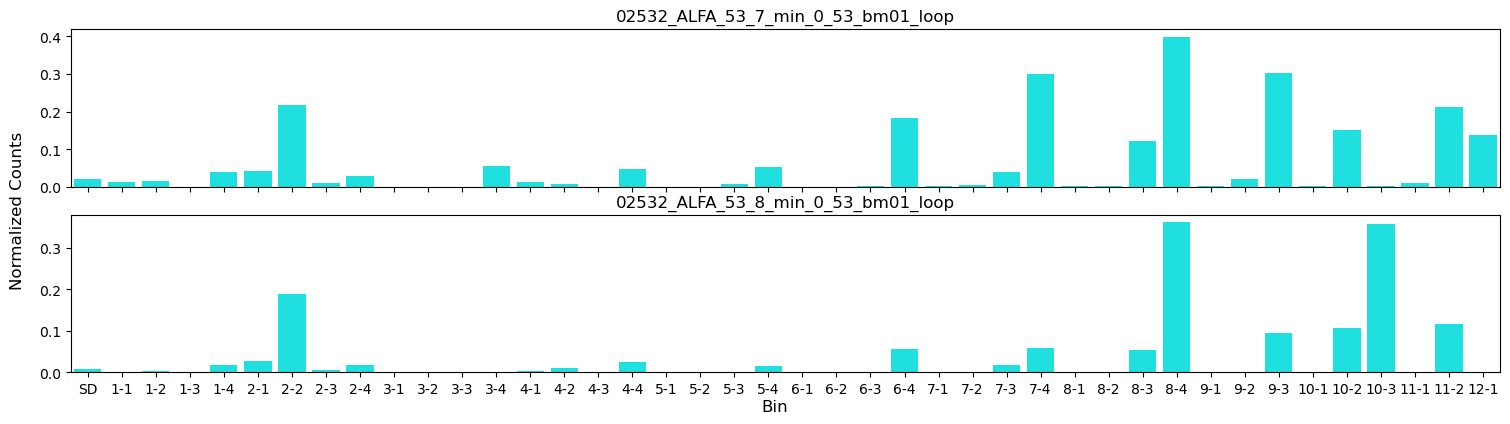

In [356]:
#plot counts for designs across all bins with counts data
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=1.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=['cyan'], order=['SD', '1-1', '1-2', '1-3', '1-4', '2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4',
                        '5-1', '5-2', '5-3', '5-4', '6-1', '6-2', '6-3', '6-4', '7-1', '7-2', '7-3', '7-4', '8-1', '8-2', '8-3', '8-4', '9-1', '9-2', '9-3', '10-1', '10-2', '10-3', '11-1', '11-2', '12-1']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.show()

<Figure size 640x480 with 0 Axes>

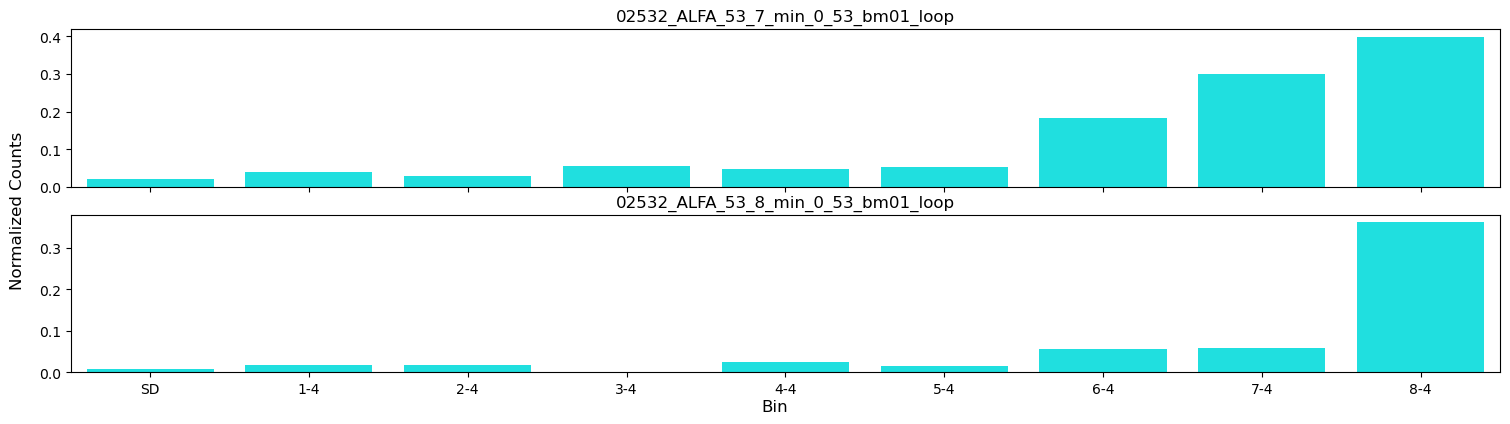

In [357]:
plt.clf()
#plot counts for designs in bin 4 only
num_subplots = len(selected_designs)
fig, axes = plt.subplots(num_subplots, 1, figsize=(15, num_subplots*2), sharex=True)
fig.tight_layout(pad=1.0)
fig.supxlabel('Bin', y=-0.01)
fig.supylabel('Normalized Counts', x=-0.01)

for plot,design in enumerate(selected_designs):
    sns.barplot(data=norm_counts_table[norm_counts_table['design'] == f'{design}'], ax=axes[plot], x='bin', y='value', palette=['cyan'], order=['SD', '1-4', '2-4', '3-4', '4-4',
                         '5-4', '6-4', '7-4', '8-4']).set(xlabel=None, ylabel=None)
    axes[plot].set_title(f'{design}')

plt.show()